In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt2
import seaborn as sns
import sys

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

from inspect import signature
from sklearn.metrics import average_precision_score,precision_recall_curve

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

In [2]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
os.chdir("C:/Users/Acesocloud/Downloads/Kaggle/Santander Customer Transaction Prediction/Sailesh Santander")

In [4]:
df_santander = pd.read_csv("train.csv")

In [5]:
df_santander_test = pd.read_csv("test.csv")

In [6]:
print('Shape of our dataset:')
print(df_santander.shape,'\n')

Shape of our dataset:
(200000, 202) 



In [7]:
pd.options.display.max_columns = None

# Exploratory Data Analysis

In [8]:
print('*'*25,'Exploratory Data Analysis: ','*'*25,'\n')


************************* Exploratory Data Analysis:  ************************* 



In [9]:
print('Showing 1st few rows of our dataset: \n')
print(df_santander.head(5))

Showing 1st few rows of our dataset: 

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_

In [10]:
print("Basic info about dataset:\n")
print(df_santander.info())

Basic info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
None


In [11]:
print("Data Description:\n")


Data Description:



### Target Class Count

In [12]:
target_count = df_santander['target'].value_counts()

In [13]:
print("Count of categories of the target variable:\n", target_count)

Count of categories of the target variable:
 0    179902
1     20098
Name: target, dtype: int64


In [14]:
print("Percentage of each category of the target variable:\n", ((target_count/df_santander.shape[0]))*100)

Percentage of each category of the target variable:
 0    89.951
1    10.049
Name: target, dtype: float64


### Data Visualization

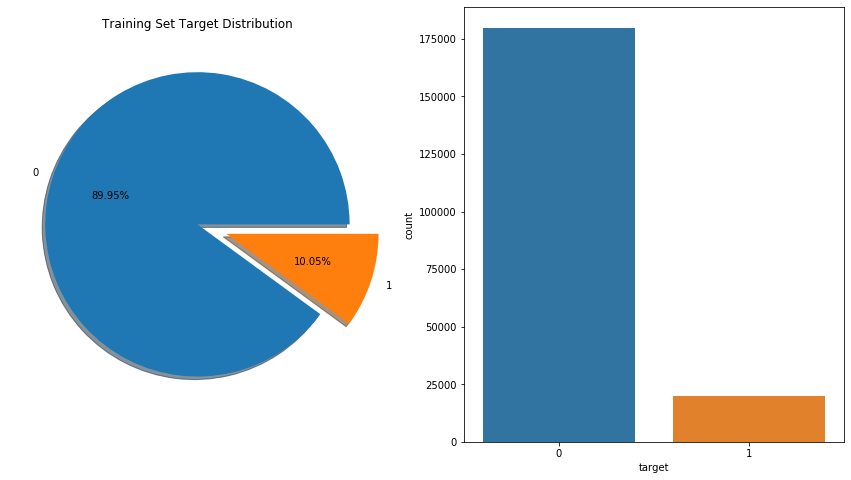

In [15]:
f, ax = plt2.subplots(1,2,figsize=(15,8))
pie_data = df_santander['target'].value_counts()
pie_data.plot.pie(explode=[0,0.2], autopct='%1.2f%%', ax = ax[0], shadow = True)
ax[0].set_title('Training Set Target Distribution')
ax[0].set_ylabel('')

sns.countplot('target', data = df_santander, ax = ax[1])
plt2.show()

### Missing Value Analysis

In [16]:
train_missing = df_santander.isnull().sum()

In [17]:
print("No. of rows having missing values in train data:")
print(train_missing.loc[train_missing > 0].shape[0])

No. of rows having missing values in train data:
0


In [18]:
test_missing = df_santander_test.isnull().sum()
print("No. of rows having missing values in test data:")
print(test_missing.loc[test_missing > 0].shape[0])

No. of rows having missing values in test data:
0


### Outlier Analysis

     Can not perform as we have imbalance dataset

### Distribution of training data

In [19]:
def plot_train_data_dist(cat_0,cat_1, label1, label2, columns):
    i = 0
    sns.set_style('darkgrid')
    
    fig = plt2.figure()
    ax = plt2.subplots(10,10,figsize=(22,18))
    
    for col in columns:
        i += 1
        plt2.subplot(10,10,i)
        sns.distplot(cat_0[col], hist=False, label=label1)
        sns.distplot(cat_1[col], hist=False, label=label2)
        plt2.legend()
        plt2.xlabel('Attribute',)
    plt2.show()

In [20]:
cat_0 = df_santander.loc[df_santander['target'] == 0]
cat_1 = df_santander.loc[df_santander['target'] == 1]

In [21]:
label1 = '0'
label2 = '1'

<Figure size 432x288 with 0 Axes>

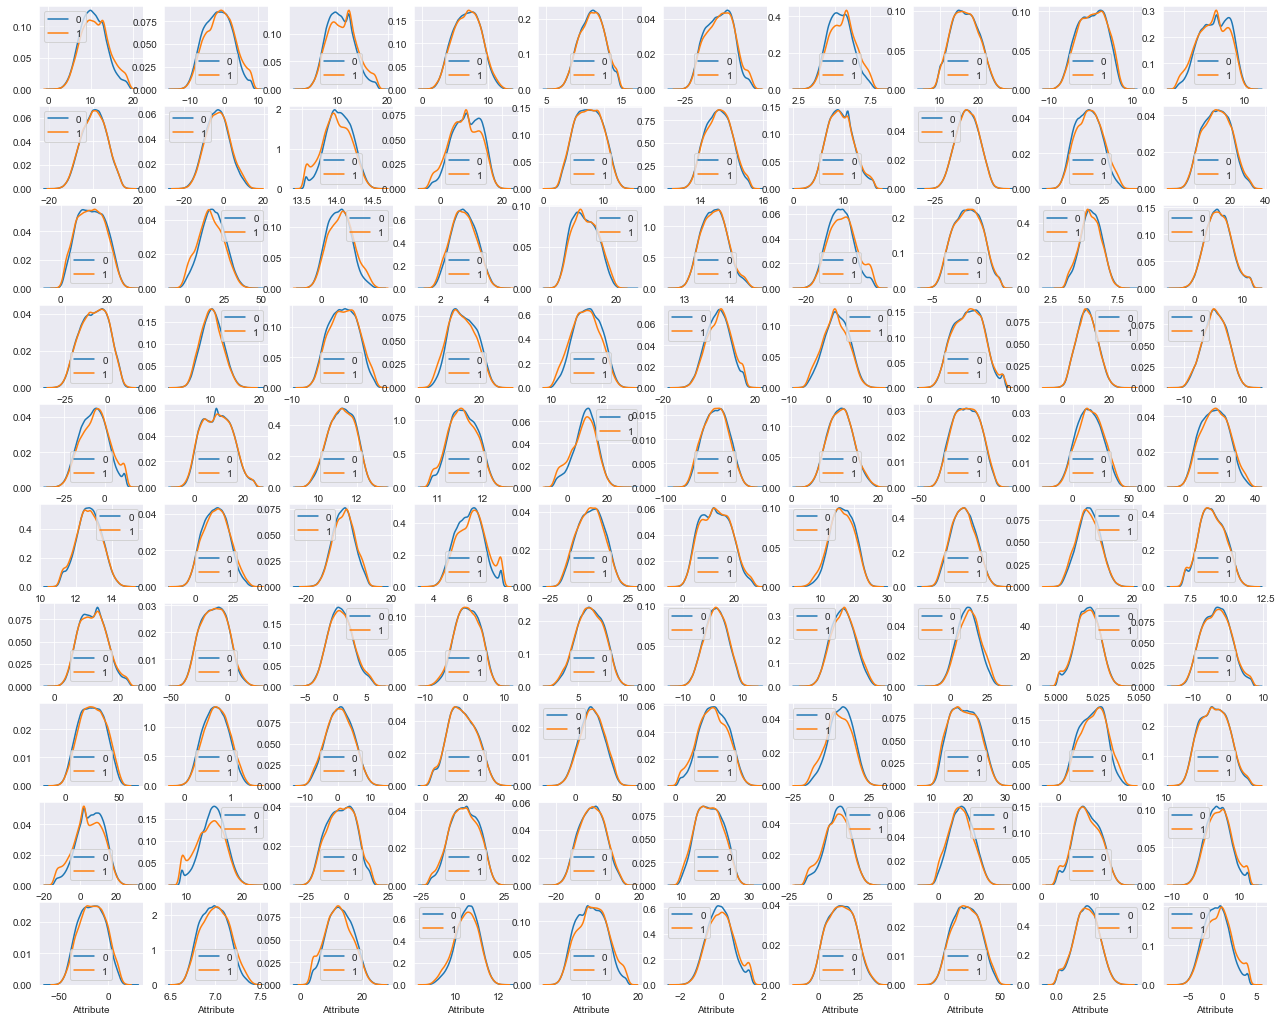

In [22]:
columns = df_santander.columns.values[2:102]
plot_train_data_dist(cat_0, cat_1, label1, label2, columns)

<Figure size 432x288 with 0 Axes>

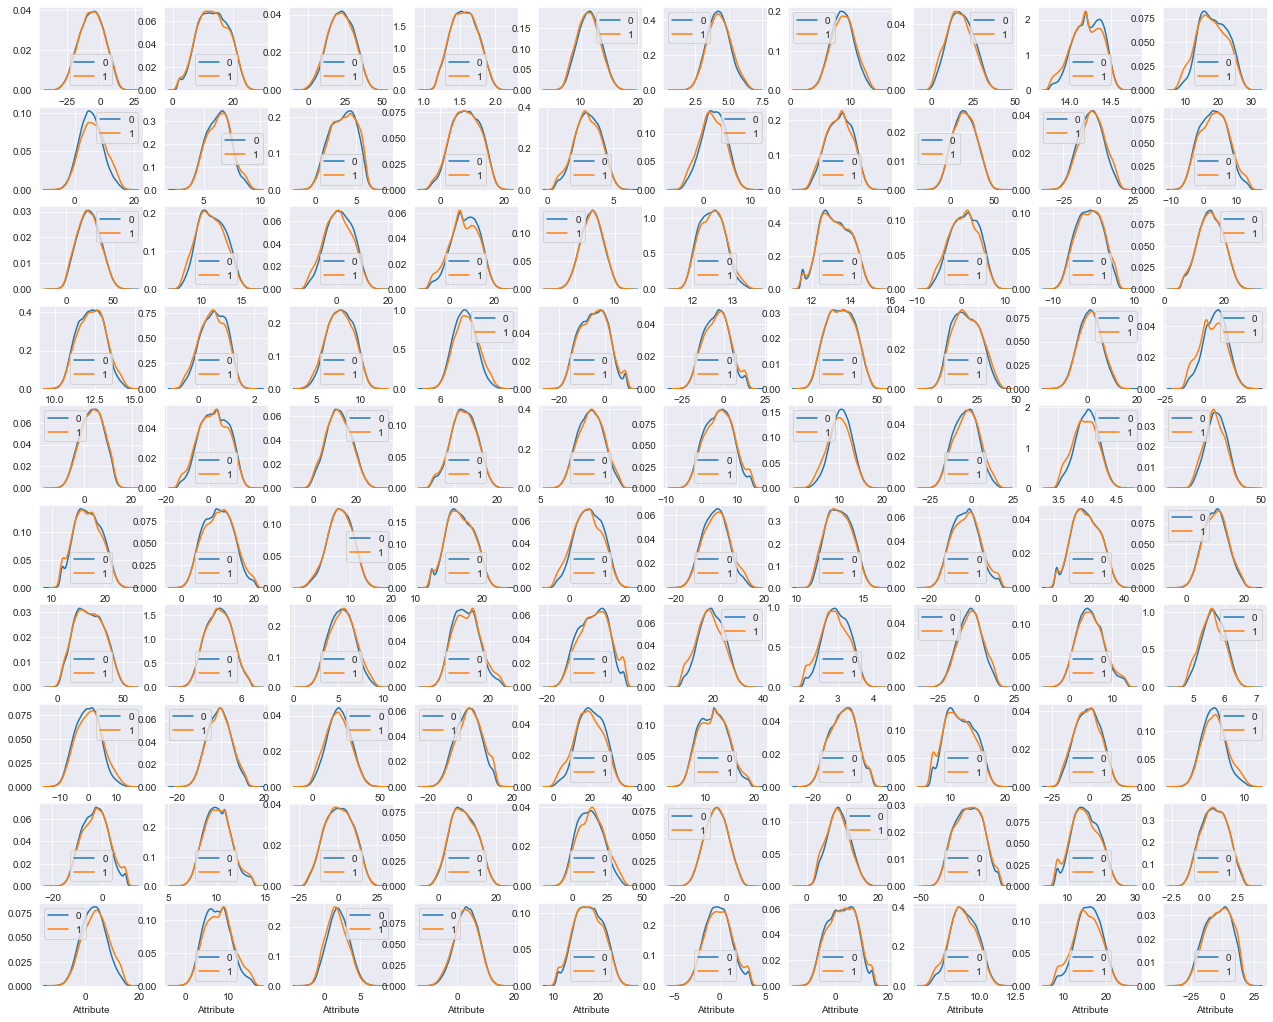

In [23]:
columns = df_santander.columns.values[102:202]
plot_train_data_dist(cat_0, cat_1, label1, label2, columns)

### Distribution of test data

In [24]:
def plot_test_data_dist(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt2.figure()
    ax=plt2.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt2.subplot(10,10,i)
        sns.distplot(df_santander_test[attribute],hist=False)
        plt2.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt2.show()

<Figure size 432x288 with 0 Axes>

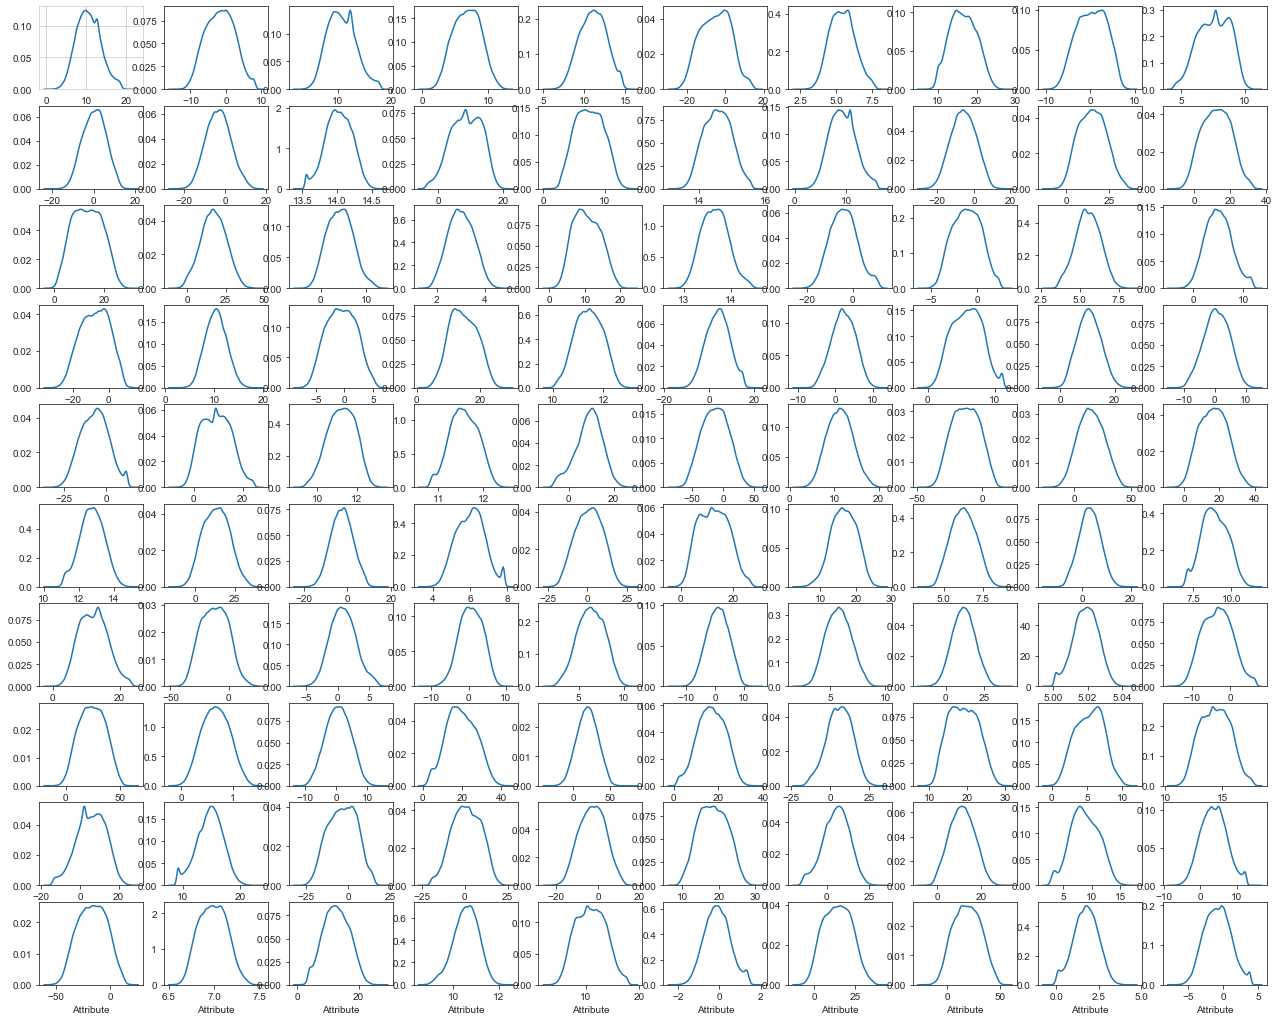

In [25]:
test_attributes=df_santander_test.columns.values[1:101]
plot_test_data_dist(test_attributes)

<Figure size 432x288 with 0 Axes>

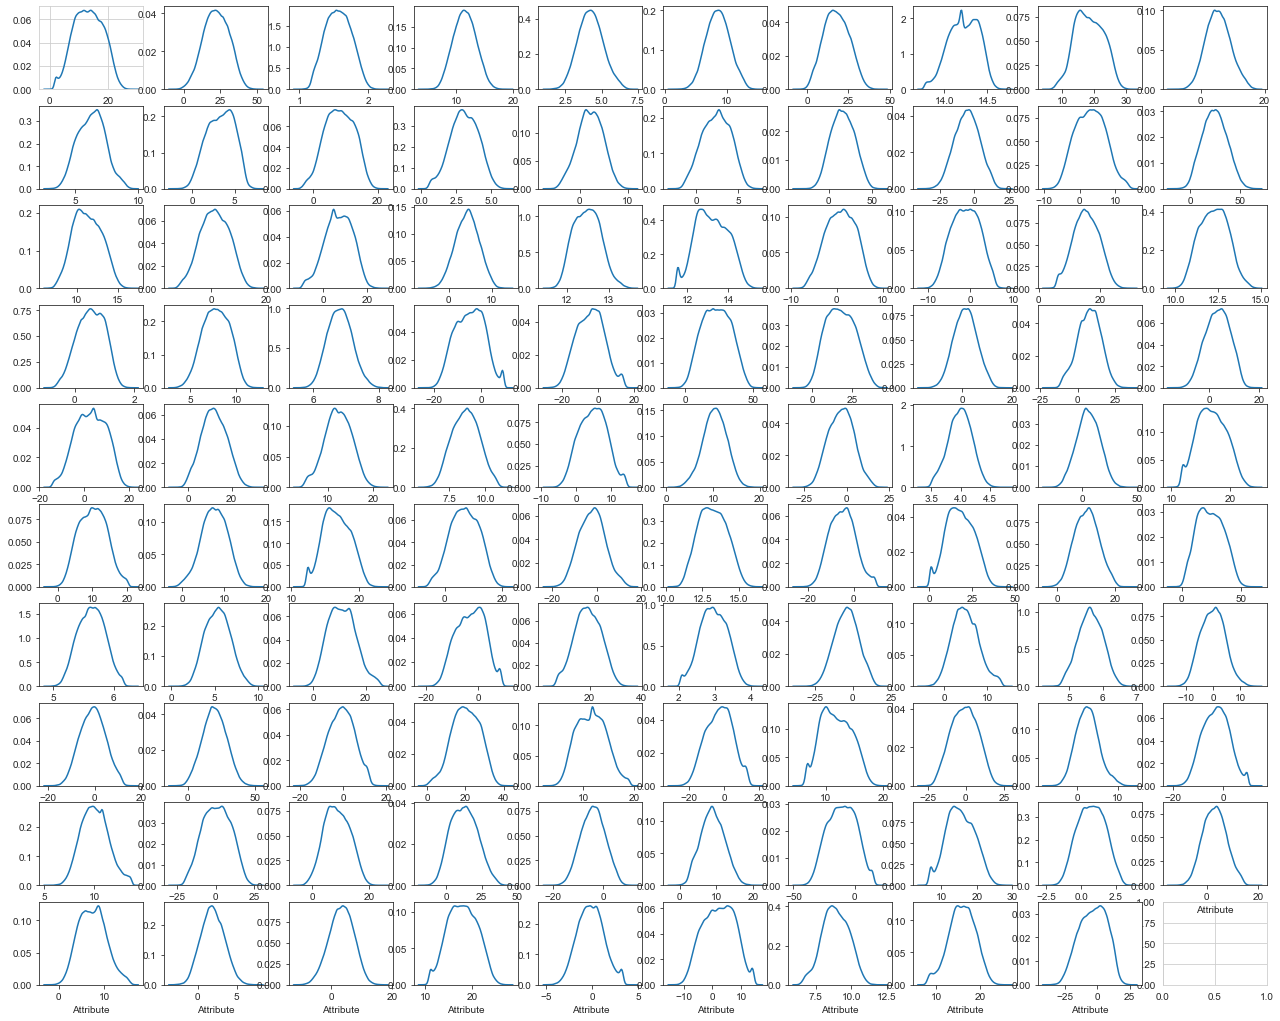

In [26]:
test_attributes=df_santander_test.columns.values[102:202]
plot_test_data_dist(test_attributes)

### Check for duplicate rows

In [27]:
duplicateRowsDF = df_santander[df_santander.duplicated()]
 
print("No. of duplicate rows based on all columns are :")
print(duplicateRowsDF.shape[0])

No. of duplicate rows based on all columns are :
0


In [28]:
duplicateRowsDF = df_santander_test[df_santander_test.duplicated()]
 
print("No. of duplicate rows based on all columns are :")
print(duplicateRowsDF.shape[0])

No. of duplicate rows based on all columns are :
0


### Correlation Analysis

In [29]:
num_train = df_santander.columns.values[2:202]
num_test = df_santander_test.columns.values[1:201]

#### Correlation between train data

In [30]:
train_corr = df_santander[num_train].corr().abs()

In [31]:
train_corr = train_corr.unstack()
train_corr

var_0    var_0      1.000000
         var_1      0.000544
         var_2      0.006573
         var_3      0.003801
         var_4      0.001326
                      ...   
var_199  var_195    0.002042
         var_196    0.000607
         var_197    0.004991
         var_198    0.004731
         var_199    1.000000
Length: 40000, dtype: float64

In [32]:
train_corr = train_corr.sort_values(kind="quicksort")
train_corr

var_75   var_191    2.703975e-08
var_191  var_75     2.703975e-08
var_173  var_6      5.942735e-08
var_6    var_173    5.942735e-08
var_126  var_109    1.313947e-07
                        ...     
var_128  var_128    1.000000e+00
var_127  var_127    1.000000e+00
var_126  var_126    1.000000e+00
var_124  var_124    1.000000e+00
var_199  var_199    1.000000e+00
Length: 40000, dtype: float64

In [33]:
train_corr = train_corr.reset_index()
train_corr

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
39995,var_128,var_128,1.000000e+00
39996,var_127,var_127,1.000000e+00
39997,var_126,var_126,1.000000e+00
39998,var_124,var_124,1.000000e+00


In [34]:
train_corr

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
39995,var_128,var_128,1.000000e+00
39996,var_127,var_127,1.000000e+00
39997,var_126,var_126,1.000000e+00
39998,var_124,var_124,1.000000e+00


#### Correlation between test data

In [35]:
test_corr = df_santander_test[num_test].corr().abs()

In [36]:
test_corr = test_corr.unstack()

In [37]:
test_corr = test_corr.sort_values(kind="quicksort")

In [38]:
test_corr = test_corr.reset_index()

#### Excluding correlation between same variables as that will be 1 always

In [39]:
train_corr = train_corr[train_corr['level_0']!=train_corr['level_1']]
train_corr

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
39795,var_165,var_81,9.713658e-03
39796,var_53,var_148,9.787532e-03
39797,var_148,var_53,9.787532e-03
39798,var_26,var_139,9.844361e-03


In [40]:
test_corr = test_corr[test_corr['level_0']!=test_corr['level_1']]

In [41]:
test_corr.iloc[:,2].describe()

count    3.980000e+04
mean     1.853484e-03
std      1.399296e-03
min      1.477268e-07
25%      7.349334e-04
50%      1.560695e-03
75%      2.689444e-03
max      9.867773e-03
Name: 0, dtype: float64

In [42]:
train_corr.iloc[:,2].describe()

count    3.980000e+04
mean     1.986439e-03
std      1.506084e-03
min      2.703975e-08
25%      7.903091e-04
50%      1.679507e-03
75%      2.874466e-03
max      9.844361e-03
Name: 0, dtype: float64

In [43]:
train_corr=df_santander[num_train].corr()
train_corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,-0.002514,0.000718,-0.001647,-0.001589,0.002835,-0.000225,0.003361,0.004286,-0.001448,0.001140,0.001417,-0.003589,0.000295,0.005504,0.000356,-0.007175,0.000374,0.001557,0.003704,-0.002882,-0.005575,-0.000841,-0.000818,-0.000827,0.001919,-0.000987,-0.000284,-0.004843,0.002300,-0.005071,0.000278,0.001133,-0.000220,0.001620,-0.000036,0.003087,-0.002611,-0.000541,0.003813,-0.001015,0.001022,0.001195,-0.002185,-0.000384,-0.000527,0.004329,-0.004794,-0.002046,-0.004159,0.005662,0.001961,0.001128,-0.001759,0.000722,0.000657,-0.004283,-0.000669,0.001828,-0.002476,0.000251,-0.003118,-0.000987,-0.007402,-0.001754,0.000896,-0.004338,-0.004164,-0.001196,-0.001827,0.000864,-0.002961,0.002217,0.002628,0.002141,0.004496,0.001554,-0.001635,-0.001303,-0.006375,0.002477,-0.002321,-0.003682,0.002822,0.006261,0.002669,0.001057,0.001878,-0.001843,-0.005004,-0.000163,0.000953,-0.000925,0.000189,-0.003217,0.002413,-0.002712,0.002304,-0.001100,0.000189,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,-0.000754,0.001830,0.001240,0.002492,-0.002299,-0.006390,-0.003510,-0.002197,0.004786,0.000111,0.003956,0.000057,0.004052,0.001637,0.005195,-0.004447,0.000314,0.000318,0.002675,-0.003877,0.000610,0.000567,0.000891,0.000417,0.003081,-0

In [44]:
train_corr=train_corr.values.flatten()
train_corr

array([ 1.00000000e+00, -5.43699242e-04,  6.57283380e-03, ...,
        4.99055495e-03, -4.73055989e-03,  1.00000000e+00])

In [45]:
train_corr=train_corr[train_corr!=1]

In [46]:
test_corr=df_santander_test[num_test].corr()

In [47]:
test_corr = test_corr.values.flatten()

In [48]:
test_corr=test_corr[test_corr!=1]

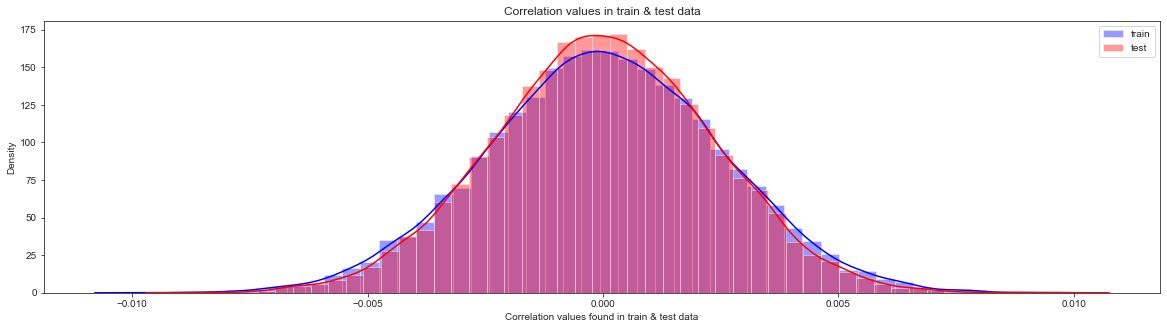

In [49]:
plt2.figure(figsize=(20,5))
sns.distplot(train_corr,color="blue",label="train")
sns.distplot(test_corr,color="red",label="test")
plt2.xlabel("Correlation values found in train & test data")
plt2.ylabel("Density")
plt2.title ("Correlation values in train & test data")
plt2.legend()

### Feature Importance

In [50]:
X = df_santander.drop(columns=['ID_code', 'target'], axis=1)
y = df_santander['target']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [52]:
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
rf_model.fit(X_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
importance = pd.DataFrame(rf_model.feature_importances_, columns = ['Feature Importance']) 

In [54]:
columns = pd.DataFrame(data=X.columns.values);

In [55]:
columns['imporatance'] = importance

In [56]:
columns = columns.rename(columns={0: "Variable"})

In [57]:
columns = columns.rename(columns={'imporatance':'importance'})

In [58]:
columns.sort_values(by=['importance'], inplace=True) 

In [59]:
columns

,Variable,importance
30,var_30,0.003018
27,var_27,0.003184
72,var_72,0.003242
38,var_38,0.003261
3,var_3,0.003287
...,...,...
109,var_109,0.009395
80,var_80,0.009492
53,var_53,0.009571
139,var_139,0.010192


In [60]:
# Var_81 most important

In [61]:
X=df_santander.drop(['ID_code','target'],axis=1)
y=df_santander['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2019)

In [62]:
sm = SMOTE(random_state=42)
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_test,y_test)

In [63]:
x = pd.concat([X_smote,y_smote],axis=1)

In [64]:
y = pd.concat([X_smote_v,y_smote_v], axis=1)

In [65]:
xy = pd.concat([x,y],axis=0)

In [66]:
X_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
23595,8.6599,2.3606,8.9668,4.7867,7.1358,0.1176,6.5557,12.4706,3.3068,6.5320,-4.2118,-8.8321,14.0014,11.6336,7.8113,14.4375,10.3351,-13.8436,19.9055,-0.0260,16.9005,11.4481,3.8725,3.2160,13.6513,13.8925,-0.9286,-2.4379,3.9924,8.3715,-10.6956,7.1053,3.3243,11.4115,11.6087,8.4368,7.0596,8.9986,7.7882,-4.3807,-0.9418,1.6639,12.3419,11.3520,2.8772,9.1123,14.1463,-12.9451,1.3358,11.3562,12.0483,19.7305,-6.1123,6.4998,9.4673,16.4725,13.8755,5.5330,7.9379,8.7493,11.1931,-3.8912,1.4945,1.0761,7.4839,0.4744,4.7277,1.6537,5.0164,-5.6238,24.4307,0.8814,2.9879,31.2183,31.3501,20.2062,5.7419,19.7520,2.2655,15.9456,-10.9449,19.4295,-0.3652,-2.8219,2.2284,16.8971,1.0149,12.0293,12.5576,0.1391,-1.1572,6.8724,15.6175,10.5130,12.8508,-0.4590,13.4077,15.9404,1.1358,1.3455,-2.9840,12.0338,22.5475,1.6989,13.4306,4.6761,7.0384,18.1261,14.0703,22.2892,4.6383,7.8870,4.1176,3.2697,3.2557,2.7920,1.9894,-1.5378,-10.7543,2.5744,14.5914,10.3074,1.5308,3.8859,2.2013,12.7401,12.2642,-3.2902,-2.9125,19.4144,13.4734,-0.1263,7.9029,6.5754,-6.4281,4.6474,16.7418,20.2015,2.7715,18.0453,6.3622,-5.2670,8.7374,13.3509,9.2591,-1.4107,12.3810,0.4404,3.7230,9.6356,14.5886,8.4344,1.7420,18.1130,13.3278,-2.8668,12.2539,-13.3168,9.1817,15.5765,26.2591,5.8651,3.6016,9.6313,-2.6552,15.5698,2.3827,-0.6156,0.8970,5.3437,-6.0574,-4.4312,23.6136,-8.9206,13.8878,7.4657,-7.8909,8.1405,10.1084,0.2095,-11.1167,10.7933,-9.0881,9.7000,14.8329,1.7128,12.7242,-15.6988,17.2893,1.0963,9.5887,5.0680,5.3819,2.4618,16.1568,0.1939,5.6911,10.0788,15.3207,2.0373
83339,12.6858,-5.0178,8.4828,6.1694,9.7005,-16.9539,6.1838,21.1163,3.2714,8.8544,1.0333,-5.4155,13.9973,14.8148,3.6604,14.9737,11.2900,-11.2965,20.8672,10.4785,18.2771,18.0243,-1.3041,3.5236,11.3481,13.6573,-11.2891,-2.3614,4.3860,5.3635,-3.1732,9.9608,0.4127,10.0517,11.8822,-2.5677,4.9593,4.5307,13.6545,2.9913,-15.5346,8.6654,11.4927,11.9888,18.8570,26.2038,12.3891,-32.3117,16.9389,19.0669,12.9900,19.7401,-8.5324,6.8626,-23.3207,3.3447,20.4229,5.6392,3.1528,9.6549,12.2707,-3.1204,-0.5437,-1.5309,6.9967,-3.2177,5.0339,12.4400,5.0267,4.3507,19.0834,0.4953,3.7559,17.9933,2.6966,12.3513,9.0309,25.4433,5.4342,13.7629,13.5652,17.1012,-9.8519,-0.7441,-4.3586,20.3600,4.4400,10.7349,5.6675,3.5143,-13.1576,6.6858,12.4596,11.5433,12.8246,0.2337,19.4059,0.7175,2.4817,-0.9238,7.3975,16.3629,35.5862,1.4413,12.3621,3.9745,9.9437,20.7051,14.3733,13.8964,4.6580,4.8971,1.9942,9.8376,2.4080,-0.6819,1.9970,26.9199,12.3785,2.8930,28.7770,12.2183,4.0676,-1.1377,10.4426,12.0241,14.3768,3.1504,-

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X_train = StandardScaler().fit_transform(X_train)

In [69]:
X_test = StandardScaler().fit_transform(X_test)

## PCA

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
x = StandardScaler().fit_transform(xy.drop(['target'],axis=1))

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=170)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_))

172.6247411126679
0.8631213066914379


In [73]:
X1 = principalDf
y1 = xy['target']
X_train_PC,X_test_PC,y_train_PC,y_test_PC=train_test_split(X1,y1,random_state=42)

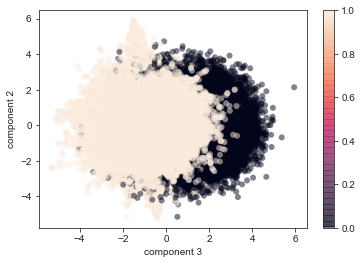

In [74]:
plt2.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],
            c=xy['target'], edgecolor='none', alpha=0.5)
plt2.xlabel('component 3')
plt2.ylabel('component 2')
plt2.colorbar();

Text(0.5, 0, 'Principal Component 3')

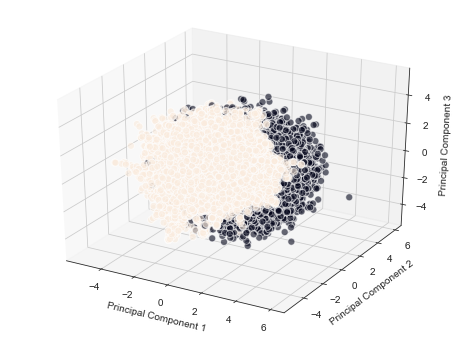

In [75]:
fig = plt2.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = principalDf.iloc[:,0]
ys = principalDf.iloc[:,1]
zs = principalDf.iloc[:,2]
# size = list(df_santander['target'])
ax.scatter(xs, ys, zs, alpha=0.6, edgecolors='w',c=xy['target'],s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

In [76]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [77]:
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

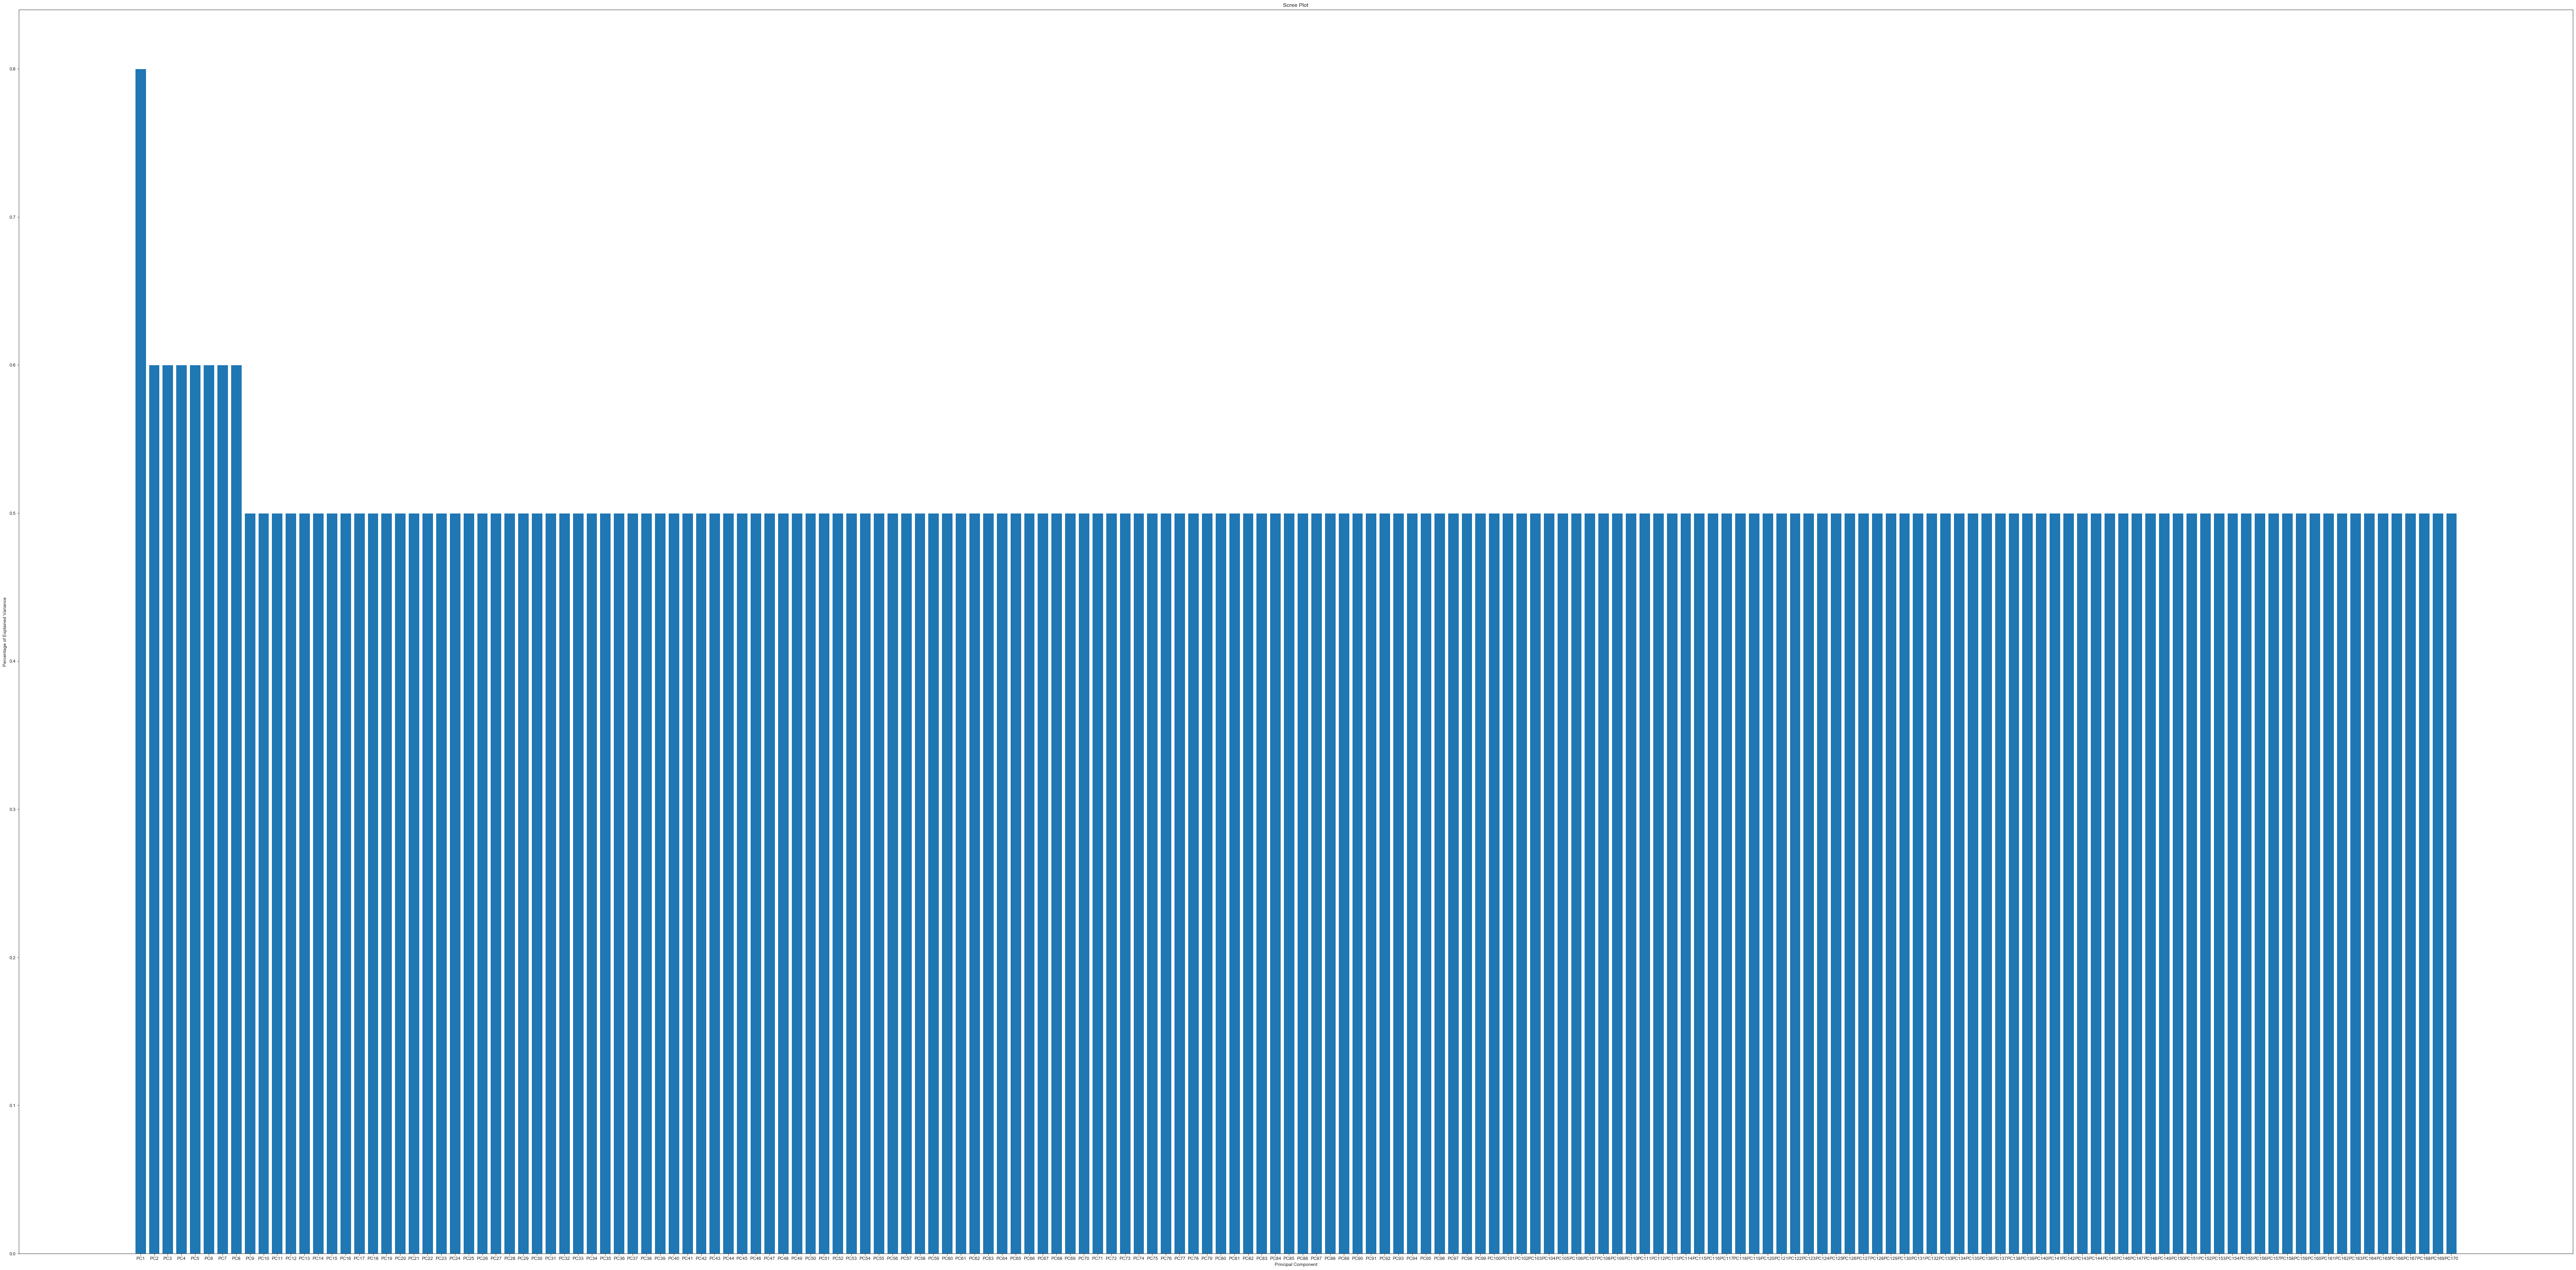

In [78]:
fig= plt2.figure(figsize=(100,50))
plt2.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt2.ylabel('Percentage of Explained Variance')
plt2.xlabel('Principal Component')
plt2.title('Scree Plot')
plt2.show()

Text(0, 0.5, 'Proportion of variance explained by additional feature')

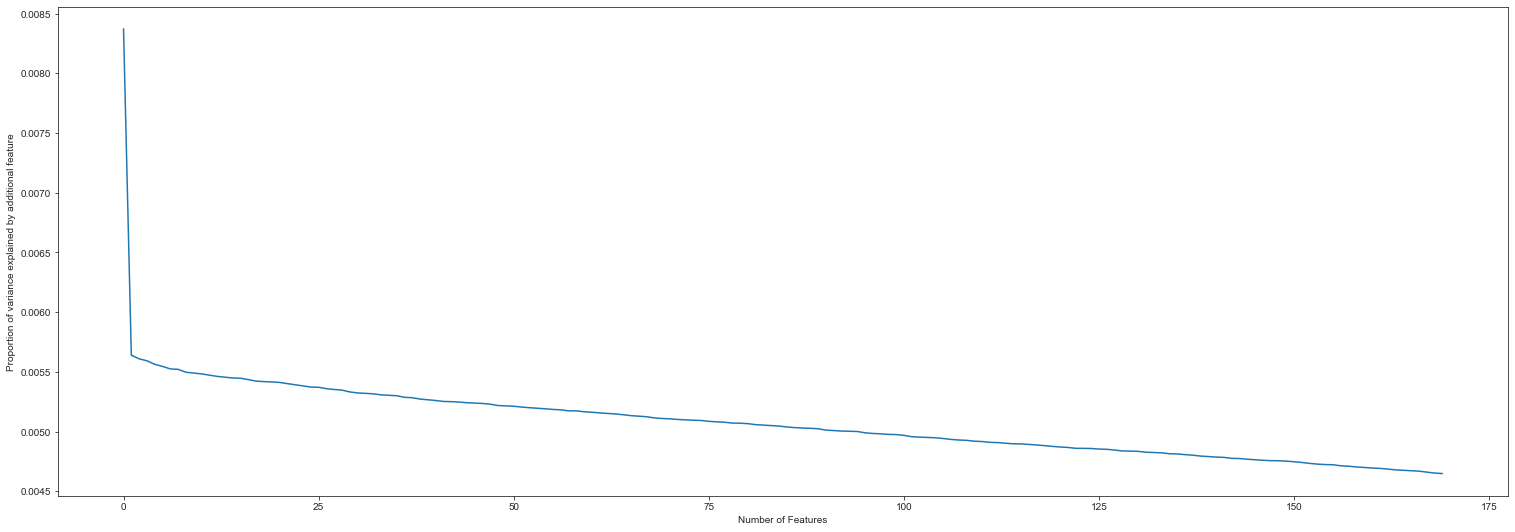

In [79]:
plt2.figure(figsize=(26,9))
plt2.plot(pca.explained_variance_ratio_)
# plt2.xticks(range(80))
plt2.xlabel("Number of Features")
plt2.ylabel("Proportion of variance explained by additional feature")

## Model

In [80]:
def draw_confusion_mx(y_test,y_pred):
    print('\n######### Confusion Matrix #########\n')
    cm=pd.crosstab(y_test,y_pred)
    print(cm)
    
def draw_classification_report(y_test,y_pred):
    print('\n######### Classification Report #########\n')
    print(classification_report(y_test,y_pred))

def draw_roc_auc(y_test,y_pred):  ##y_pred in form of probabilities
    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
    plt2.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt2.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    auc_score=auc(lr_fpr,lr_tpr)
    plt2.title('ROC(area=%0.3f)' %auc_score)
    
    plt2.xlabel('False Positive Rate')
    plt2.ylabel('True Positive Rate')
    
    plt2.legend()
    
    plt2.show()
    
def draw_precision_recall(y_test,y_pred):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt2.fill_between).parameters
               else {})
    plt2.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt2.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt2.xlabel('Recall')
    plt2.ylabel('Precision')
    plt2.ylim([0.0, 1.05])
    plt2.xlim([0.0, 1.0])
    plt2.title(' Precision-Recall curve: PR_AUC={0:0.3f}'.format( auc(recall, precision)))
    plt2.show() 

In [81]:
def fit_N_predict(model,X_train,X_test,y_train,y_test,model_code,testData,PCA=0):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred2 = model.predict_proba(X_test)
    y_pred2 = y_pred2[:,1]
    
    draw_confusion_mx(y_test,y_pred)
    
    draw_classification_report(y_test,y_pred)
    
    draw_roc_auc(y_test,y_pred2)
    
    draw_precision_recall(y_test,y_pred2) 
    if(PCA == 0):
        if(model_code!="XGB"):
            print('\n\nModel performance on test data:\n',)
            print(model.predict(testData.drop(['ID_code'],axis=1)))
        else:
            print('\n\nModel performance on test data:\n',)
            print(model.predict(testData.drop(['ID_code'],axis=1).values))
    
                                                                          

### Logistic Regression Model


In [173]:
lr_model=LogisticRegression(random_state=42,class_weight = 'balanced')


######### Confusion Matrix #########

col_0       0      1
target              
0       42282  11669
1        1375   4674

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     53951
           1       0.29      0.77      0.42      6049

    accuracy                           0.78     60000
   macro avg       0.63      0.78      0.64     60000
weighted avg       0.90      0.78      0.82     60000



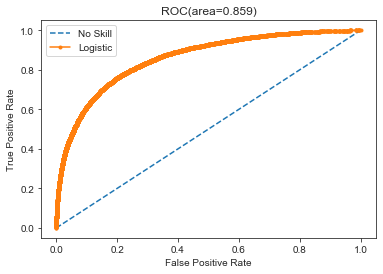

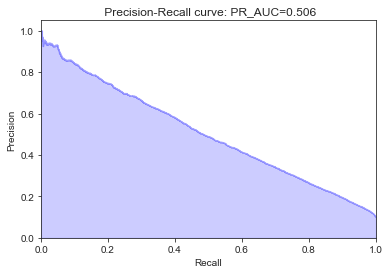



Model performance on test data:

[0 0 0 ... 0 0 0]


In [174]:
print("LOGISTIC REGRESSION ON ORIGINAL DATASET\n\n")
fit_N_predict(lr_model,X_train,X_test,y_train,y_test,model_code='LR',testData=df_santander_test)

## Logistic Regression after applying SMOTE


######### Confusion Matrix #########

col_0       0      1
target              
0       42258  11693
1       11565  42386

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     53951
           1       0.78      0.79      0.78     53951

    accuracy                           0.78    107902
   macro avg       0.78      0.78      0.78    107902
weighted avg       0.78      0.78      0.78    107902



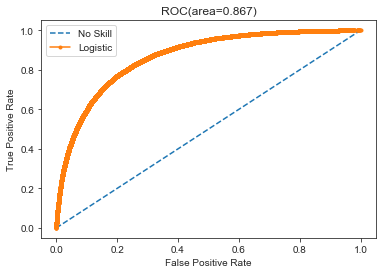

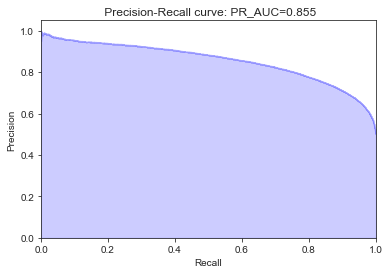



Model performance on test data:

[1 1 0 ... 0 0 1]


In [149]:
print("LOGISTIC REGRESSION SMOTE DATASET\n\n")
fit_N_predict(lr_model,X_smote,X_smote_v,y_smote,y_smote_v,model_code='LR',testData=df_santander_test)

## LR on SMOTE dataset and PCA


######### Confusion Matrix #########

col_0       0      1
target              
0       35480   9342
1        8802  36327

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     44822
           1       0.80      0.80      0.80     45129

    accuracy                           0.80     89951
   macro avg       0.80      0.80      0.80     89951
weighted avg       0.80      0.80      0.80     89951



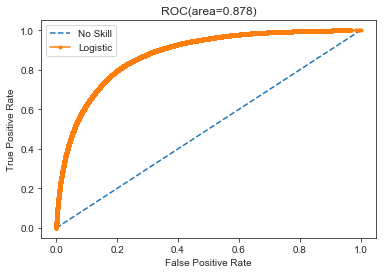

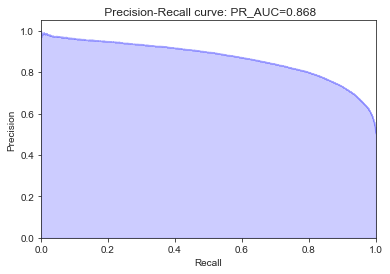

In [152]:
print("LOGISTIC REGRESSION ON PCA+SMOTE DATASET\n\n")
fit_N_predict(lr_model,X_train_PC,X_test_PC,y_train_PC,y_test_PC,model_code='LR',testData = df_santander_test,PCA=1)

# Decision Tree

In [153]:
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)


######### Confusion Matrix #########

col_0       0      1
target              
0       35288  18663
1        2631   3418

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.93      0.65      0.77     53951
           1       0.15      0.57      0.24      6049

    accuracy                           0.65     60000
   macro avg       0.54      0.61      0.51     60000
weighted avg       0.85      0.65      0.72     60000



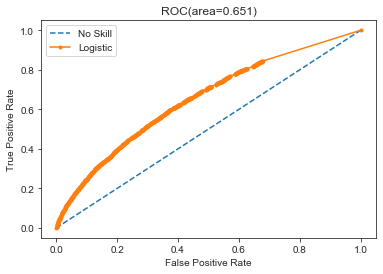

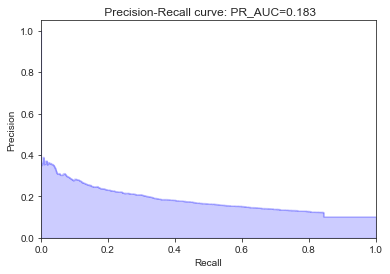



Model performance on test data:

[0 0 0 ... 0 1 0]


In [154]:
print("DECISION TREE ON ORIGINAL DATASET\n\n")
fit_N_predict(tree_clf,X_train,X_test,y_train,y_test,model_code='DT',testData=df_santander_test)

### Decision Tree after applying SMOTE


######### Confusion Matrix #########

col_0       0      1
target              
0       39740  14211
1       23352  30599

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     53951
           1       0.68      0.57      0.62     53951

    accuracy                           0.65    107902
   macro avg       0.66      0.65      0.65    107902
weighted avg       0.66      0.65      0.65    107902



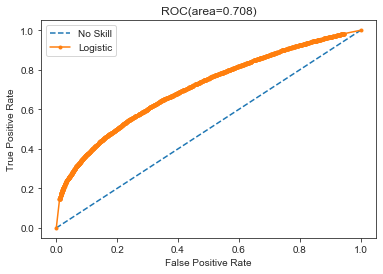

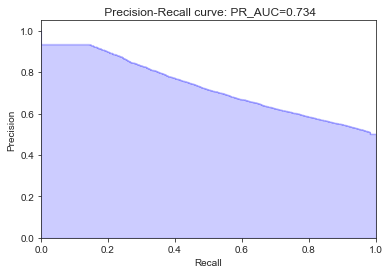



Model performance on test data:

[0 0 1 ... 1 0 1]


In [155]:
print("DECISION TREE ON SMOTE DATASET\n\n")
fit_N_predict(tree_clf,X_smote,X_smote_v,y_smote,y_smote_v,model_code='DT',testData=df_santander_test)

## DT + SMOTE + PCA


######### Confusion Matrix #########

col_0       0      1
target              
0       36194   8628
1        8386  36743

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     44822
           1       0.81      0.81      0.81     45129

    accuracy                           0.81     89951
   macro avg       0.81      0.81      0.81     89951
weighted avg       0.81      0.81      0.81     89951



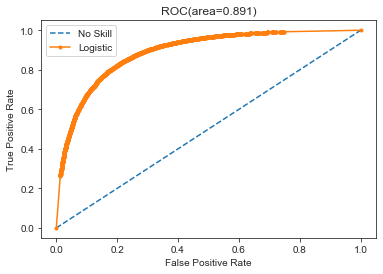

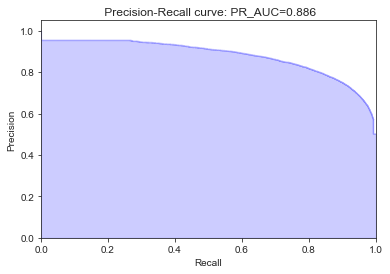

In [158]:
print("DECISION TREE ON PCA+SMOTE DATASET\n\n")
fit_N_predict(tree_clf,X_train_PC,X_test_PC,y_train_PC,y_test_PC,model_code='DT',testData=df_santander_test,PCA=1)

## Random Forest

In [159]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=2019, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 100,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished



######### Confusion Matrix #########

col_0       0     1
target             
0       46483  7468
1        2970  3079

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     53951
           1       0.29      0.51      0.37      6049

    accuracy                           0.83     60000
   macro avg       0.62      0.69      0.64     60000
weighted avg       0.87      0.83      0.85     60000



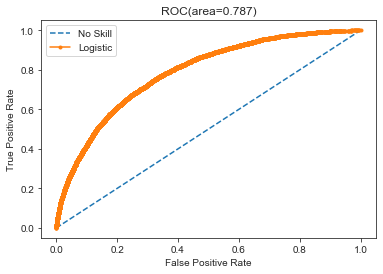

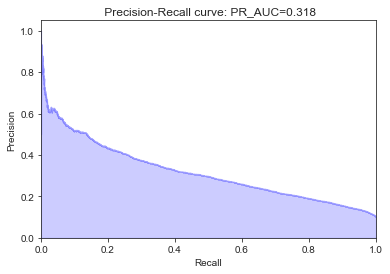



Model performance on test data:



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


[1 1 1 ... 0 1 1]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [160]:
print("RANDOM FOREST ON ORIGINAL DATASET\n\n")
fit_N_predict(random_forest,X_train,X_test,y_train,y_test,model_code='RF',testData=df_santander_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 39.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished



######### Confusion Matrix #########

col_0       0      1
target              
0       47641   6310
1       20146  33805

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.70      0.88      0.78     53951
           1       0.84      0.63      0.72     53951

    accuracy                           0.75    107902
   macro avg       0.77      0.75      0.75    107902
weighted avg       0.77      0.75      0.75    107902



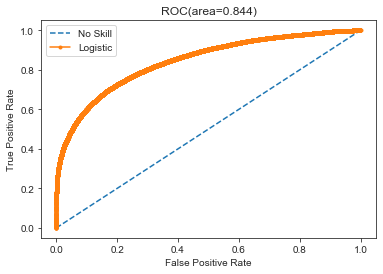

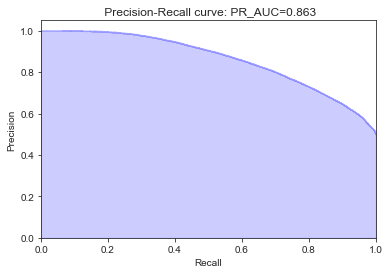



Model performance on test data:



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s


[0 1 0 ... 0 0 0]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished


In [161]:
print("RANDOM FOREST ON SMOTE DATASET\n\n")
fit_N_predict(random_forest,X_smote,X_smote_v,y_smote,y_smote_v,model_code='RF',testData=df_santander_test)

### RF + SMOTE + PCA

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 42.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished



######### Confusion Matrix #########

col_0       0      1
target              
0       37035   7787
1        7010  38119

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     44822
           1       0.83      0.84      0.84     45129

    accuracy                           0.84     89951
   macro avg       0.84      0.84      0.84     89951
weighted avg       0.84      0.84      0.84     89951



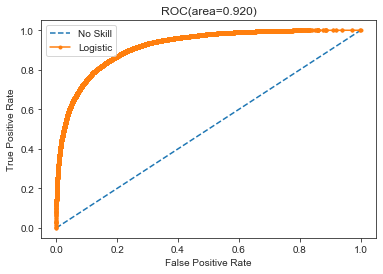

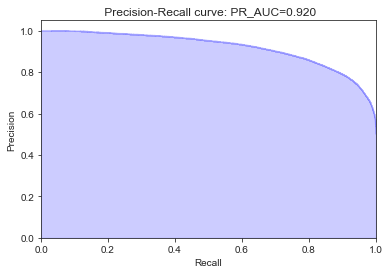

In [162]:
print("RANDOM FOREST ON PCA+SMOTE DATASET\n\n")
fit_N_predict(random_forest,X_train_PC,X_test_PC,y_train_PC,y_test_PC,model_code='RF',testData=df_santander_test,PCA=1)

## NaiveBayes

In [163]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()


######### Confusion Matrix #########

col_0       0     1
target             
0       53077   874
1        3857  2192

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     53951
           1       0.71      0.36      0.48      6049

    accuracy                           0.92     60000
   macro avg       0.82      0.67      0.72     60000
weighted avg       0.91      0.92      0.91     60000



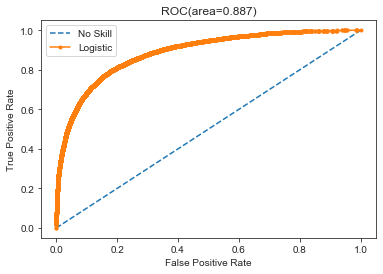

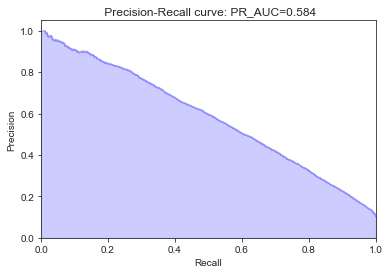



Model performance on test data:

[1 1 1 ... 1 1 1]


In [164]:
print("NAIVE BAYES ON ORIGINAL DATASET\n\n")
fit_N_predict(NB_model,X_train,X_test,y_train,y_test,model_code='NB',testData=df_santander_test)


######### Confusion Matrix #########

col_0       0      1
target              
0       51757   2194
1       12190  41761

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     53951
           1       0.95      0.77      0.85     53951

    accuracy                           0.87    107902
   macro avg       0.88      0.87      0.87    107902
weighted avg       0.88      0.87      0.87    107902



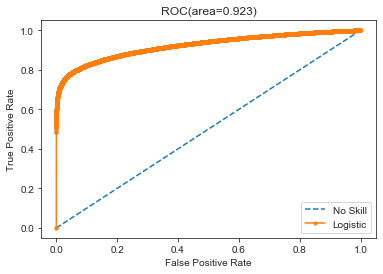

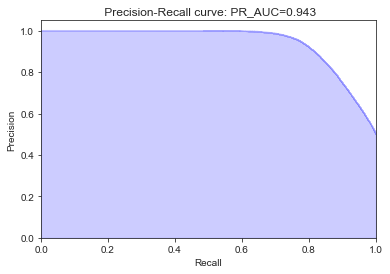



Model performance on test data:

[0 0 0 ... 0 0 1]


In [165]:
print("NAIVE BAYES ON SMOTE DATASET\n\n")
fit_N_predict(NB_model,X_smote,X_smote_v,y_smote,y_smote_v,model_code='NB',testData=df_santander_test)


######### Confusion Matrix #########

col_0       0      1
target              
0       42001   2821
1        9757  35372

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     44822
           1       0.93      0.78      0.85     45129

    accuracy                           0.86     89951
   macro avg       0.87      0.86      0.86     89951
weighted avg       0.87      0.86      0.86     89951



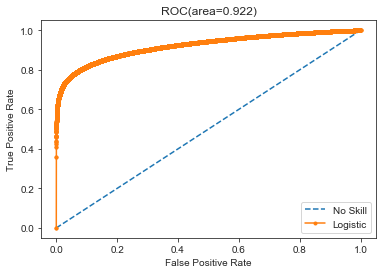

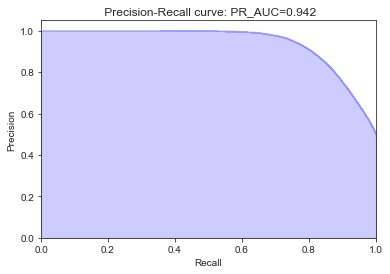

In [166]:
print("NAIVE BAYES ON PCA+SMOTE DATASET\n\n")
fit_N_predict(NB_model,X_train_PC,X_test_PC,y_train_PC,y_test_PC,model_code='NB',testData=df_santander_test,PCA=1)

## XGBoost

In [88]:
from xgboost import XGBClassifier

In [89]:
XGB = XGBClassifier(learning_rate =0.1,
 n_estimators=800,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 seed=27,scale_pos_weight=2)


######### Confusion Matrix #########

col_0       0     1
target             
0       52794  1157
1        3672  2377

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     53951
           1       0.67      0.39      0.50      6049

    accuracy                           0.92     60000
   macro avg       0.80      0.69      0.73     60000
weighted avg       0.91      0.92      0.91     60000



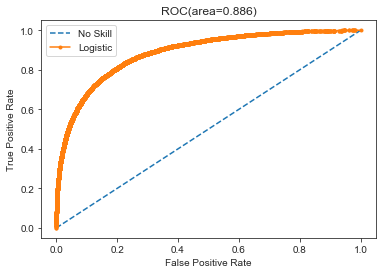

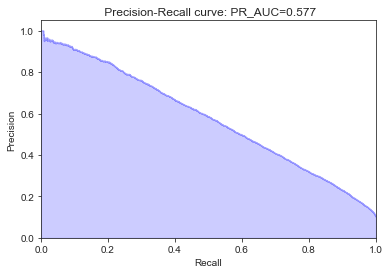



Model performance on test data:

[1 1 1 ... 1 1 1]


In [90]:
print("XGBOOST CLASSIFIER ON ORIGINAL DATASET\n\n")
fit_N_predict(XGB,X_train,X_test,y_train,y_test,model_code='XGB',testData=df_santander_test)


######### Confusion Matrix #########

col_0       0      1
target              
0       47976   5975
1        7324  46627

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     53951
           1       0.89      0.86      0.88     53951

    accuracy                           0.88    107902
   macro avg       0.88      0.88      0.88    107902
weighted avg       0.88      0.88      0.88    107902



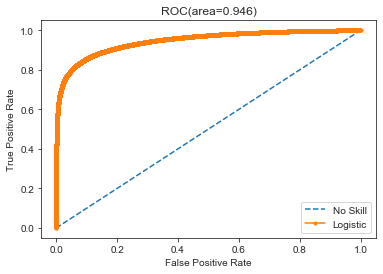

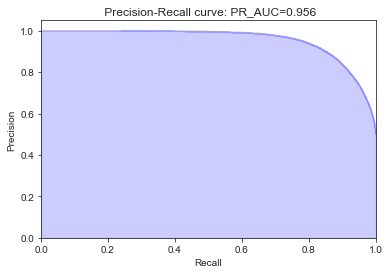



Model performance on test data:

[0 0 0 ... 0 0 1]


In [91]:
print("XGBOOST CLASSIFIER ON SMOTE DATASET\n\n")
fit_N_predict(XGB,X_smote,X_smote_v,y_smote,y_smote_v,model_code='XGB_SM',testData=df_santander_test)


######### Confusion Matrix #########

col_0       0      1
target              
0       38121   6701
1        2800  42329

######### Classification Report #########

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     44822
           1       0.86      0.94      0.90     45129

    accuracy                           0.89     89951
   macro avg       0.90      0.89      0.89     89951
weighted avg       0.90      0.89      0.89     89951



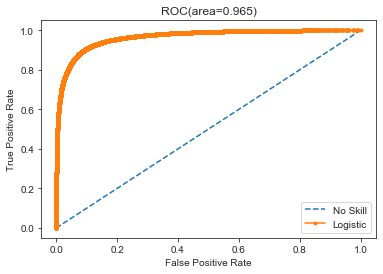

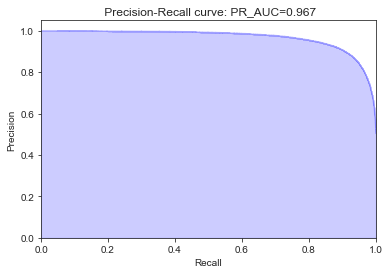

In [92]:
print("XGBOOST CLASSIFIER ON SMOTE ON PCA DATASET\n\n")
fit_N_predict(XGB,X_train_PC,X_test_PC,y_train_PC,y_test_PC,model_code='XGB',testData=df_santander_test,PCA=1)